In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
# import housing file
US_housing_file = "Housing Prices for US.csv"
US_housing_data = pd.read_csv(US_housing_file)
US_housing = US_housing_data.rename(columns={"MSPUS":"Avg Home Price","DATE":"Date (Quarterly)"})
US_housing.head()

,Date (Quarterly),Avg Home Price
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


In [3]:
# import unemployment file
US_unemployment_file = "Unemployment for US.csv"
US_unemployment_data = pd.read_csv(US_unemployment_file)
US_unemployment = US_unemployment_data.rename(columns={"LRUN64TTUSQ156S":"Unemployment Rate (%)","DATE":"Date (Quarterly)"})
US_unemployment.head()

,Date (Quarterly),Unemployment Rate (%)
0,1/1/1970,4.171920
1,4/1/1970,4.808736
2,7/1/1970,5.316556
3,10/1/1970,5.825915
4,1/1/1971,5.995553


In [4]:
US_housing_v_unemployment = pd.merge(US_housing, US_unemployment, on="Date (Quarterly)")
US_housing_v_unemployment.head()

,Date (Quarterly),Avg Home Price,Unemployment Rate (%)
0,1/1/1970,23900,4.171920
1,4/1/1970,24400,4.808736
2,7/1/1970,23000,5.316556
3,10/1/1970,22600,5.825915
4,1/1/1971,24300,5.995553


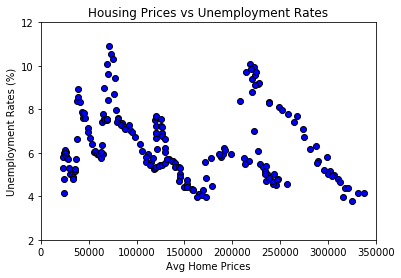

In [5]:
housing = US_housing_v_unemployment["Avg Home Price"]
unemployment = US_housing_v_unemployment["Unemployment Rate (%)"]

plt.scatter(housing, unemployment, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(2, 12)
plt.xlim(0, 350000)

plt.title("Housing Prices vs Unemployment Rates")
plt.xlabel("Avg Home Prices")
plt.ylabel("Unemployment Rates (%)")

plt.show()

C:\Users\hoyos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


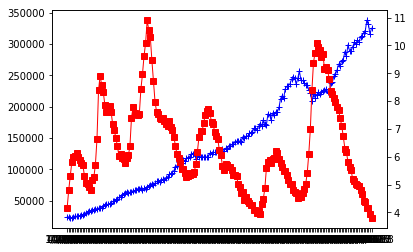

In [13]:
import pylab

x = US_housing_v_unemployment["Date (Quarterly)"]
y1 = US_housing_v_unemployment["Avg Home Price"]
y2 = US_housing_v_unemployment["Unemployment Rate (%)"]

#pylab.close('all')

fig = pylab.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(x_axis, y1, marker="+",color="blue", linewidth=1, label="Avg House Prices")
ax2.plot(x_axis, y2, marker="s", color="Red", linewidth=1, label="Unemployment Rate (%)")

fig.show() 

In [12]:
scipy.stats.ttest_ind(housing, unemployment, axis=0, equal_var=True, nan_policy='propagate')[source]

NameError: name 'scipy' is not defined

In [13]:
stats.f_oneway(housing, unemployment)

F_onewayResult(statistic=2.764891046233999, pvalue=0.09972006548928272)

In [14]:
stats.chisquare(US_housing_v_unemployment["Avg Home Price"], US_housing_v_unemployment["Unemployment Rate (%)"])

Power_divergenceResult(statistic=1009143455034.272, pvalue=0.0)